In [1]:
import torch, os
from diffusers import (

    StableDiffusionXLPipeline, 
    StableDiffusionXLImg2ImgPipeline,
    UNet2DConditionModel, 
    EulerDiscreteScheduler
)
from huggingface_hub import hf_hub_download
from safetensors.torch import load_file
from diffusers.utils import load_image
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm, trange
from prompt import *

/opt/conda/lib/python3.10/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/opt/conda/lib/python3.10/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [2]:
base = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionXLPipeline.from_pretrained(
    base, torch_dtype=torch.float16, variant="fp16").to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [9]:
images = []

for key in prompt:
    key_images = pipe(
        prompt=prompt[key],
        negative_prompt=negative_prompt,
        num_iterative_steps=50,
        guidance_scale=12,
        num_images_per_prompt=4,
    ).images

    images.extend(key_images)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

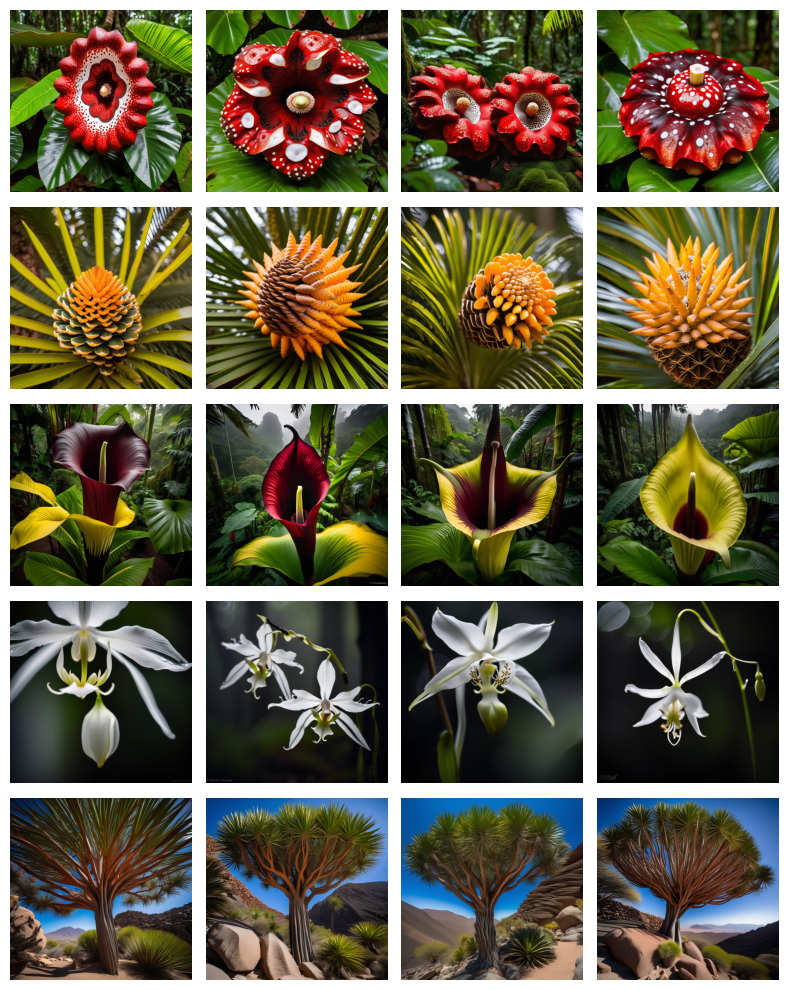

In [11]:
fig, axes = plt.subplots(5, 4, figsize=(8, 10))
axes = axes.flatten()

for i, image in enumerate(images):
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.savefig('./images/synthetic-12.png')
plt.show()

In [12]:
# pipe.set_progress_bar_config(disable=False)

images = []

for key in prompt:
    key_images = pipe(
        prompt=prompt[key],
        negative_prompt=negative_prompt,
        num_iterative_steps=50,
        guidance_scale=8,
        num_images_per_prompt=4,
    ).images

    images.extend(key_images)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

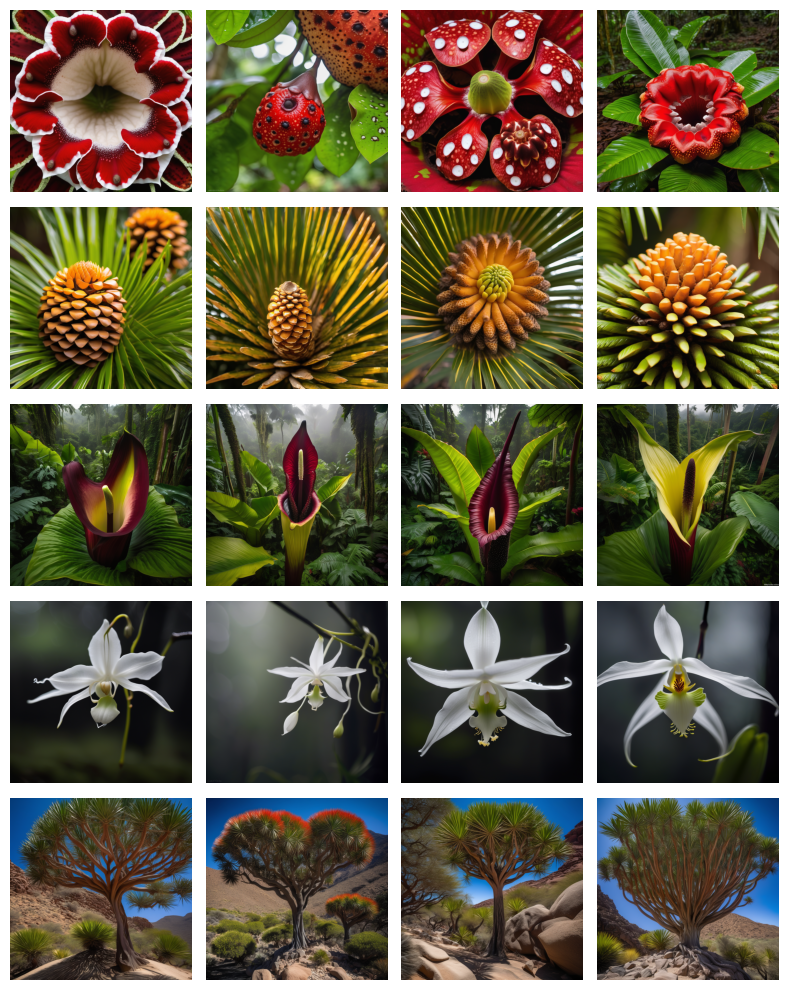

In [14]:
fig, axes = plt.subplots(5, 4, figsize=(8, 10))
axes = axes.flatten()

for i, image in enumerate(images):
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.savefig('./images/synthetic-8.png')
plt.show()

In [15]:
images = []

for key in prompt:
    key_images = pipe(
        prompt=prompt[key],
        negative_prompt=negative_prompt,
        num_iterative_steps=50,
        guidance_scale=18,
        num_images_per_prompt=4,
    ).images

    images.extend(key_images)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

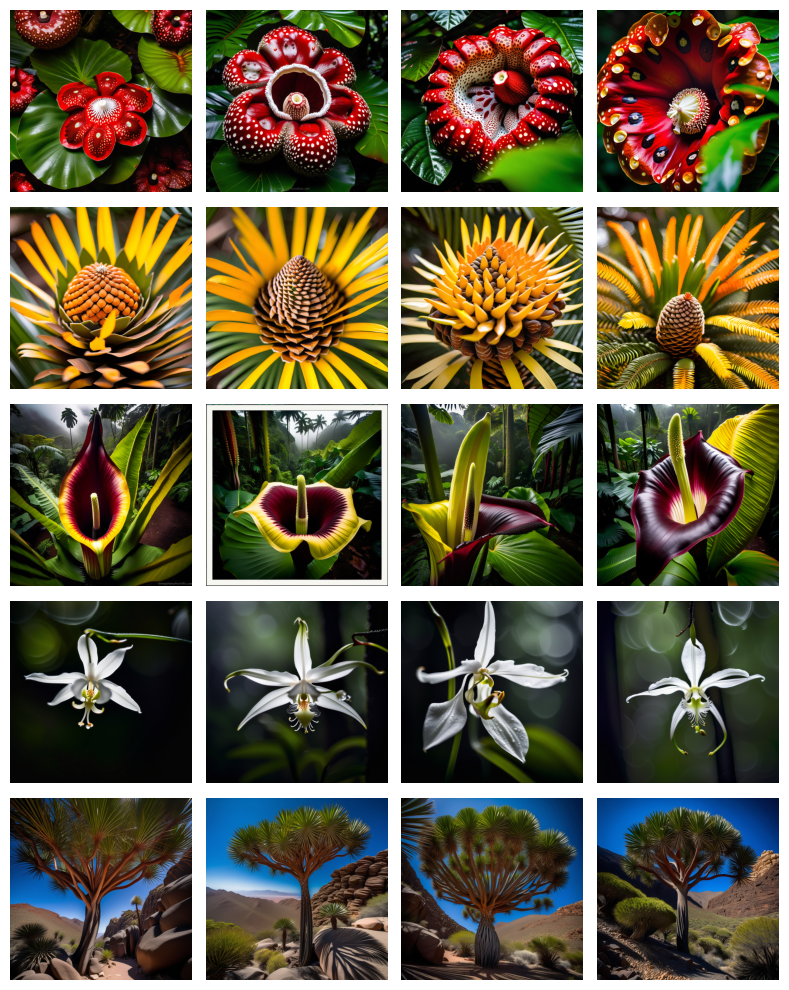

In [17]:
fig, axes = plt.subplots(5, 4, figsize=(8, 10))
axes = axes.flatten()

for i, image in enumerate(images):
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.savefig('./images/synthetic-18.png')
plt.show()

In [ ]:
pipe.set_progress_bar_config(disable=True)

for plant in tqdm(list(prompt)):
    path = f'./data/synthetic/{plant}'
    if not os.path.exists(path):
        os.makedirs(path)

    idx = 0 
    for guidance in trange(12, 20):
        for batch in trange(10):
            images = pipe(
                prompt=prompt[plant],
                negative_prompt=negative_prompt,
                num_iterative_steps=50,
                guidance_scale=guidance,
                num_images_per_prompt=4,
            ).images

            for image in images:
                idx += 1
                image = image.resize((320, 320))
                image.save(f'{path}/{idx:03d}.png')

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]